In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


# Visualizing the processed data
In this notebook, we aim to visualize our core components of the project.
## 1. Timeline visualization
We'll start with creating a timeline for each name, and display a certain amount of movies (for example the top 10) that came out throughout the years.

In [9]:
folder_processed_data_path = './data/processed_data/'

movie_df = pd.read_csv(os.path.join(folder_processed_data_path, 'movie_df.csv'))
movie_df.set_index(['wiki_ID'], inplace=True)

name_by_movie_df = pd.read_csv(os.path.join(folder_processed_data_path, 'name_by_movie_ordered_df.csv'))
name_by_movie_df.set_index(['wiki_ID', 'char_words', 'gender'], inplace=True)

baby_name_df = pd.read_csv(os.path.join(folder_processed_data_path, 'baby_name_df.csv'))
baby_name_df.set_index(['name', 'year'], inplace=True)

**Visualisation for a specific name:** Let's choose a name and visualize the variation of the baby names throughout the years. We'll pick `Mia`, because it's a cool name.

In [18]:
# Set a name
chosen_name = "Mia"

# Filter the name_by_movie_df by the chosen name
filt_name_by_movie_df = name_by_movie_df.query("char_words == @chosen_name").copy(deep=True)
filt_name_by_movie_df.reset_index(inplace=True)

display(filt_name_by_movie_df.sort_values(by="wiki_ID").head())
print(f"There are {len(filt_name_by_movie_df)} movies with a character named {chosen_name}.")

,wiki_ID,char_words,gender,order
0,54173,Mia,F,2.0
1,99984,Mia,F,25.0
2,176545,Mia,F,4.0
3,248222,Mia,F,3.0
4,370064,Mia,F,12.0


There are 47 movies with a character named Mia.


In [20]:
# Keep only wiki_ID column
filt_name_by_movie_df = filt_name_by_movie_df[['wiki_ID']].copy(deep=True)

# Merge the movie_df with the filt_name_by_movie_df
filt_movie_df = pd.merge(movie_df, filt_name_by_movie_df, on='wiki_ID', how='inner').copy(deep=True)
display(filt_movie_df.sort_values(by="wiki_ID").head())

,wiki_ID,mov_name,release,revenue,numVotes,averageRating
35,54173,Pulp Fiction,1994,213928762.0,2158972,8.9
22,99984,Una Aventura Llamada Menudo,1982,NaN,34,6.2
2,176545,The Seventh Seal,1957,NaN,194183,8.1
13,248222,The Fast and the Furious,2001,207283925.0,409735,6.8
8,370064,Love Actually,2003,246942017.0,508246,7.6


There are too many movies. Let's keep only the 10 most famous ones for now. We base it on the `numVotes` column, representing the number of IMDB votes:

In [25]:
# We set the number of top movies for this visualization
top_movie_count = 10

# Sort by top rated movies
sorted_filt_movie_df = filt_movie_df.sort_values(by='numVotes', ascending=False).copy(deep=True)

# Keep only the top 10 movies
filt_movie_df = sorted_filt_movie_df.head(top_movie_count).copy(deep=True)
display(filt_movie_df)

# Get the release dates
release_serie = filt_movie_df['release']

,wiki_ID,mov_name,release,revenue,numVotes,averageRating
35,54173,Pulp Fiction,1994,213928762.0,2158972,8.9
8,370064,Love Actually,2003,246942017.0,508246,7.6
17,31567587,The Fast and the Furious 6,2013,NaN,410579,7.0
13,248222,The Fast and the Furious,2001,207283925.0,409735,6.8
33,28085067,Fast Five,2011,626100000.0,400211,7.3
4,15656621,Fast & Furious,2009,363164265.0,304616,6.5
2,176545,The Seventh Seal,1957,NaN,194183,8.1
10,34250968,The Evil Dead,2013,NaN,193645,6.5
31,564986,The Princess Diaries,2003,168335153.0,158588,6.4
19,8896753,Case 39,2009,13000000.0,91889,6.2


We now plot the percentage of babies having the chosen name `Mia` for each year:

There are 83 years with a character named Mia. 
The earliest year is 1933 and the latest is 2022.


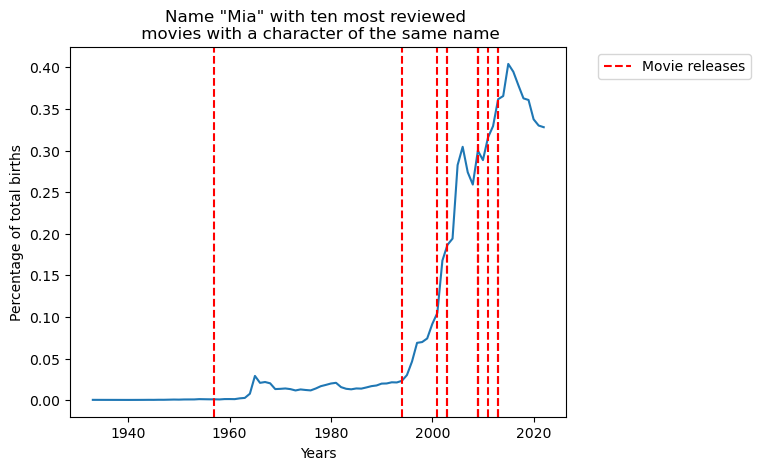

In [41]:
# Grab percentage data
percentage_df = baby_name_df.loc[chosen_name]['percentage'].to_frame().reset_index()
percentage_df.sort_values(by=['year'], ascending=True, inplace=True)
print(f"There are {len(percentage_df)} years with a character named {chosen_name}. \nThe earliest year is {percentage_df['year'].min()} and the latest is {percentage_df['year'].max()}.")

x_values = percentage_df['year'].values
y_values = percentage_df['percentage'].values

# Plotting
plt.plot(x_values, y_values)
plt.xlabel('Years')
plt.ylabel('Percentage of total births')
plt.title(f'Name "{chosen_name}" with ten most reviewed \n movies with a character of the same name')

# Draw vertical lines for each movie release
vertical_lines_series = release_serie.values
for x_value in vertical_lines_series:
    plt.axvline(x=x_value, color='r', linestyle='--')

# Labeling
plt.axvline(x=x_value, color='r', linestyle='--', label='Movie releases')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

We note that there are not 10 marks on the graphs, that's because some movies had the same release year. We won't be able to distinguish them in our analysis and they will be considered as having the same impact (which would be in reality their "cumulated" impact).